In [2]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 2.0465 - acc: 0.3673
Epoch 2/10
60000/60000 [==============================] - 1s 11us/step - loss: 1.7664 - acc: 0.5733
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 1.5840 - acc: 0.6446
Epoch 4/10
60000/60000 [==============================] - 1s 12us/step - loss: 1.4302 - acc: 0.6772
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 1.3021 - acc: 0.7034
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 1.1914 - acc: 0.7213
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 1.1003 - acc: 0.7353
Epoch 8/10
60000/60000 [==============================] - 1s 14us/step - loss: 1.0236 - acc: 0.7475: 0s - loss: 1.0495 -
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.960

In [7]:
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 0s 29us/step


[0.9058372423171998, 0.7553]

In [15]:
model.predict(X_test.reshape(-1, 784))

array([[0.00570363, 0.01987314, 0.00646761, ..., 0.10322866, 0.0409911 ,
        0.2630723 ],
       [0.02617922, 0.0100944 , 0.3060593 , ..., 0.00845119, 0.02641189,
        0.0103001 ],
       [0.02032271, 0.6547102 , 0.01520294, ..., 0.02276886, 0.01478282,
        0.01249015],
       ...,
       [0.14910758, 0.01837745, 0.02283132, ..., 0.00504568, 0.2520499 ,
        0.04567268],
       [0.03724015, 0.48508692, 0.0198788 , ..., 0.02174336, 0.01171637,
        0.01677108],
       [0.00398353, 0.0241414 , 0.0057798 , ..., 0.35367423, 0.02902535,
        0.05369368]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


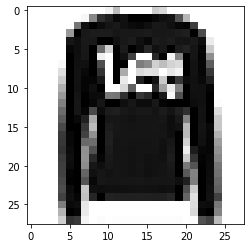

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [16]:
pred = model.predict(X_test.reshape(-1, 784))

In [19]:
import numpy as np

np.argmax(pred[1]) #die höchste Zahl von [1] wird ermittelt -> hier 2 mit ca. 28%
#alternative Erklärung: an welcher Stelle ist die höchste Zahl?

2

In [12]:
np.argmax(pred, axis=1) #gleiche Funktionsweise wie eins drüber, nur dass über alle Objekte iteriert wird

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [13]:
!pip install pandas_ml

In [20]:
from pandas_ml import ConfusionMatrix

ConfusionMatrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
#y_test entspricht den richtigen Werten
#vergleicht die richtigen Werte, mit den predictive Werten

Predicted     0    1     2     3     4    5    6     7     8     9  __all__
Actual                                                                     
0           787    2    15   100    11    2   63     0    20     0     1000
1             7  909    14    52    14    0    2     0     2     0     1000
2            21    2   628    13   224    0   92     0    20     0     1000
3            41   13     6   858    24    0   52     0     5     1     1000
4             1    4   212    69   644    0   65     0     5     0     1000
5             2    1     0     1     1  715    0   160    18   102     1000
6           221    4   151    74   201    2  305     0    42     0     1000
7             0    0     0     0     0   41    0   881     1    77     1000
8            11    1    10    11     8   12   25    15   905     2     1000
9             0    0     0     1     0   20    0    56     2   921     1000
__all__    1091  936  1036  1179  1127  792  604  1112  1020  1103    10000

In [22]:
#auf der rechten Seite stehen die y_test Werte(wir haben von jedem Kleidungsstück 1000)
#auf der unteren Seite stehen die Werte die für die Vorhersage herausgekommen sind
# 0 0 sagt aus, dass n richtig waren. -> Model sagt Klasse 0 voraus und es handelt sich auch um Klasse 0
